In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df =pd.read_csv('../Data/gurgaon_properties_cleaned_v2.csv')


In [3]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat  maa bhagwati residency    sector 7   0.45          5000.0   
1          flat            apna enclave    sector 3   0.50          7692.0   
2          flat  tulsiani easy in homes  sohna road   0.40          6722.0   
3          flat     smart world orchard   sector 61   1.47         12250.0   
4          flat        parkwood westend   sector 92   0.70          5204.0   

     area                            areaWithType  bedRoom  bathroom balcony  \
0   900.0          Carpet area: 900 (83.61 sq.m.)        2         2       1   
1   650.0          Carpet area: 650 (60.39 sq.m.)        2         2       1   
2   595.1          Carpet area: 595 (55.28 sq.m.)        2         2       3   
3  1200.0        Carpet area: 1200 (111.48 sq.m.)        2         2       2   
4  1345.1  Super Built up area 1345(124.95 sq.m.)        2         2       3   

   ...  super_built_up_area built_up_area carpet_area  Study room  \
0  ...                  NaN           NaN       900.0           0   
1  ...                  NaN           NaN       650.0           0   
2  ...                  NaN           NaN       595.0           0   
3  ...                  NaN           NaN      1200.0           1   
4  ...               1345.0           NaN         NaN           1   

   Servant room  Store room  pooja room  others  furnishing_type  luxury_score  
0             0           0           0       0                0            28  
1             0           0           0       0                2            37  
2             0           0           0       0                0            36  
3             0           0           0       0                0            76  
4             0           0           0       0                0             0  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3783 non-null   object 
 1   society              3782 non-null   object 
 2   sector               3783 non-null   object 
 3   price                3782 non-null   float64
 4   price_per_sqft       3782 non-null   float64
 5   area                 3782 non-null   float64
 6   areaWithType         3783 non-null   object 
 7   bedRoom              3783 non-null   int64  
 8   bathroom             3783 non-null   int64  
 9   balcony              3783 non-null   object 
 10  floorNum             3764 non-null   float64
 11  facing               2938 non-null   object 
 12  agePossession        3783 non-null   object 
 13  super_built_up_area  1914 non-null   float64
 14  built_up_area        1715 non-null   float64
 15  carpet_area          1941 non-null   f

In [5]:
df.duplicated().sum()

124

In [6]:
df.drop_duplicates(inplace =True)

In [7]:
df.duplicated().sum()

0

- Property Type  vs price 

<Axes: xlabel='property_type', ylabel='price'>

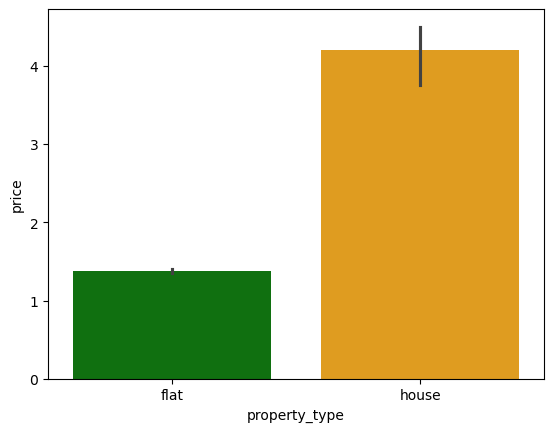

In [9]:
# df['property_type'].value_counts().plot(kind ='bar')
sns.barplot(x =df['property_type'] ,y=df['price'] ,estimator =np.median ,hue =df['property_type'],palette=['green', 'orange'])

Observations 
- Flats are in avg range of 1-2 cr while houses are costly in the range 3-4 cr  
- Most of the data consist of the flats 

<Axes: xlabel='property_type', ylabel='price'>

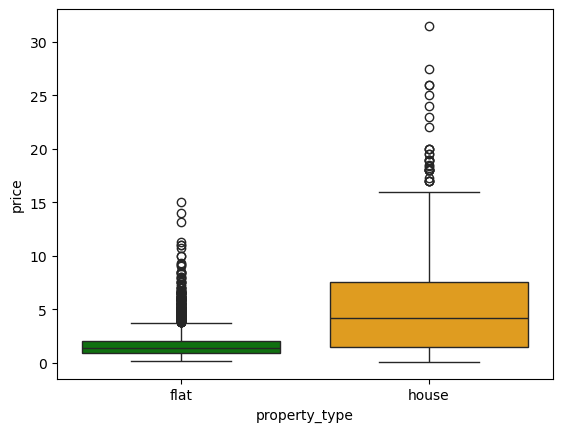

In [11]:
sns.boxplot(x=df['property_type'] , y=df['price'] ,hue =df['property_type'] ,palette=['green', 'orange'])

Observation 
 - the whisker of the graph for the flat is from 0-5 cr while for the house it ranges from the 0-15 cr 
 - there are a lot of outliers that needs to be handled in both the cases 

# property_type vs area  

<Axes: xlabel='property_type', ylabel='built_up_area'>

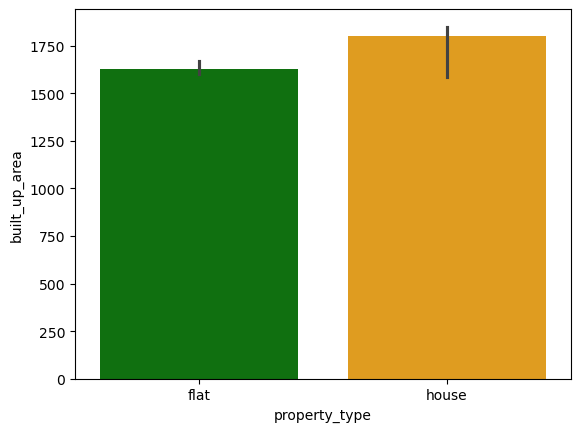

In [14]:
sns.barplot(x =df['property_type'] , y=df['built_up_area'] ,estimator =np.median ,hue =df['property_type'] ,palette=['green', 'orange'])

Observations 
 - the area of houses are more than that of the flats 
 - For house area lies between the range 0-1600 while for the house it lies between the range of 0-1750

<Axes: xlabel='property_type', ylabel='built_up_area'>

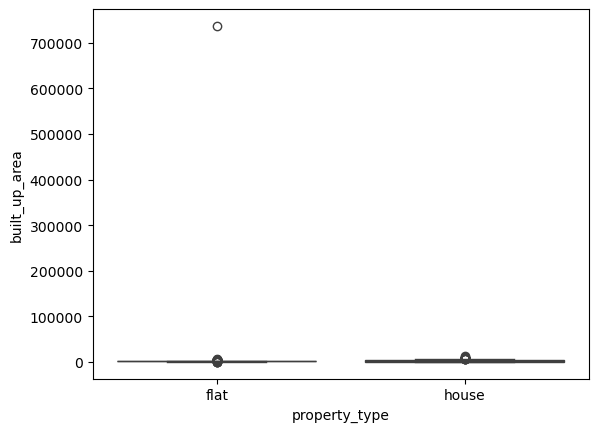

In [16]:
sns.boxplot(x=df['property_type'] ,y=df['built_up_area'])

- Here we can see the one crazy outlier in our data which we need to remove 

In [18]:
df[df['built_up_area']>5000]['built_up_area']

493       5200.0
1942      5010.0
2280      5350.0
2407    737147.0
2409      5200.0
          ...   
3702      5200.0
3725      9500.0
3740      6228.0
3743      5400.0
3762      7000.0
Name: built_up_area, Length: 66, dtype: float64

In [19]:
# The Crazy built up area is 737147 
df =df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

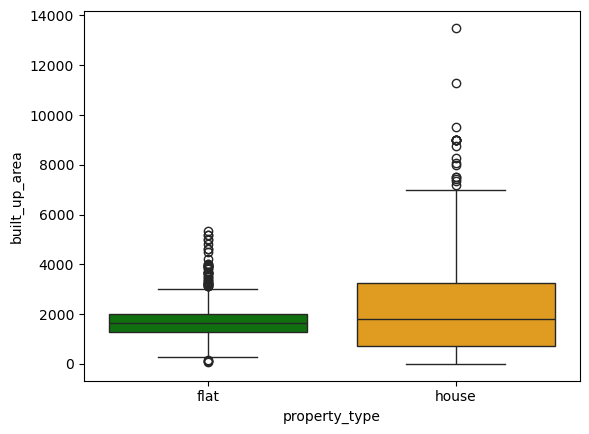

In [20]:
sns.boxplot(x=df['property_type'] ,y=df['built_up_area'],hue = df['property_type'] ,palette=['green', 'orange'])

Now we got a decent bar plot 
- Most of the value are in range 1000-2000 for flats and for house most of the values are in the range 1000-4000
- There are still some outliers that we need to manage

In [22]:
# property_type vs area 


<Axes: xlabel='property_type', ylabel='price_per_sqft'>

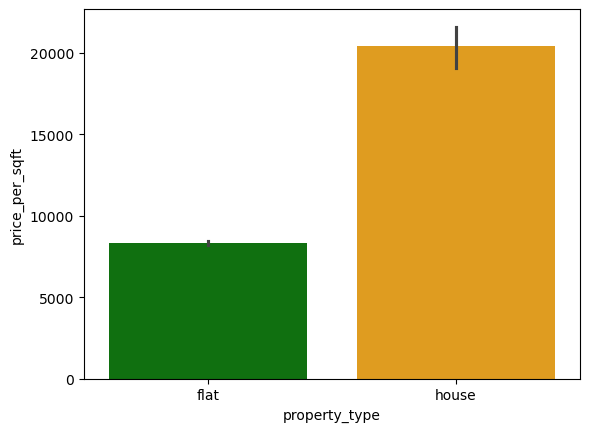

In [23]:
sns.barplot(x=df['property_type'] ,y=df['price_per_sqft'] ,estimator =np.median ,hue =df['property_type'] ,palette=['green', 'orange'])

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

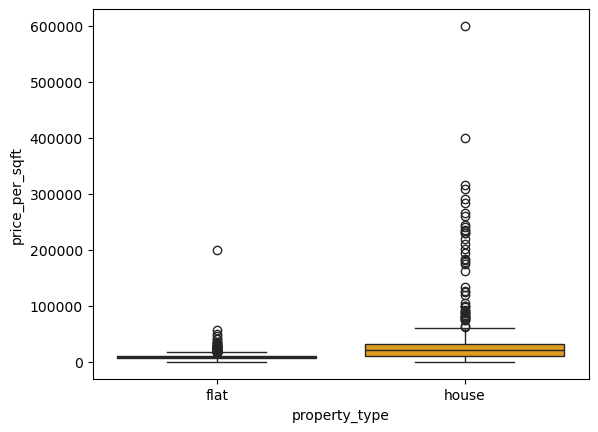

In [25]:
sns.boxplot(x=df['property_type'] ,y =df['price_per_sqft'] ,hue =df['property_type'] ,palette=['green', 'orange'])

Observations 
 - We can see that there lies a outliers in our data that is giving us unwanted result 


In [29]:
# Check Outliers 
df[df['price_per_sqft']>10000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

property_type                 society             sector  price  \
3             flat     smart world orchard          sector 61   1.47   
6             flat              the cocoon  dwarka expressway   2.00   
9             flat          raheja revanta          sector 78   4.75   
15            flat              sobha city         sector 108   3.95   
16            flat            senate court          sector 62   0.90   
...            ...                     ...                ...    ...   
3778         house             Independent          sector 57   4.75   
3779         house        dlf city phase 1          sector 26   5.50   
3780         house  dlf city plots phase 2          sector 25   4.25   
3781         house        dlf city phase 1          sector 26   4.50   
3782         house        dlf city phase 1          sector 26   3.25   

      price_per_sqft    area  \
3            12250.0  1200.0   
6            13333.0  1500.0   
9            16885.0  2813.1   
15           16859.0  2343.0   
16           14084.0   639.0   
...              ...     ...   
3778         28787.0  1650.0   
3779         30556.0  1800.0   
3780         31481.0  1350.0   
3781         33333.0  1350.0   
3782         33129.0   981.0   

                                           areaWithType  super_built_up_area  \
3                      Carpet area: 1200 (111.48 sq.m.)                  NaN   
6                Super Built up area 1500(139.35 sq.m.)               1500.0   
9                    Built Up area: 2813 (261.34 sq.m.)                  NaN   
15    Built Up area: 2343 (217.67 sq.m.)Carpet area:...                  NaN   
16                     Built Up area: 639 (59.37 sq.m.)                  NaN   
...                                                 ...                  ...   
3778  Plot area 1600(148.64 sq.m.)Built Up area: 170...                  NaN   
3779                        Plot area 200(167.23 sq.m.)                  NaN   
3780                        Plot area 150(125.42 sq.m.)                  NaN   
3781                        Plot area 150(125.42 sq.m.)                  NaN   
3782                         Plot area 109(91.14 sq.m.)                  NaN   

      built_up_area  carpet_area  
3               NaN       1200.0  
6               NaN          NaN  
9            2813.0          NaN  
15           2343.0       2300.0  
16            639.0          NaN  
...             ...          ...  
3778         1700.0       1650.0  
3779         1800.0          NaN  
3780         1350.0          NaN  
3781         1350.0          NaN  
3782          981.0          NaN  

[1555 rows x 10 columns]

In [30]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat  maa bhagwati residency    sector 7   0.45          5000.0   
1          flat            apna enclave    sector 3   0.50          7692.0   
2          flat  tulsiani easy in homes  sohna road   0.40          6722.0   
3          flat     smart world orchard   sector 61   1.47         12250.0   
4          flat        parkwood westend   sector 92   0.70          5204.0   

     area                            areaWithType  bedRoom  bathroom balcony  \
0   900.0          Carpet area: 900 (83.61 sq.m.)        2         2       1   
1   650.0          Carpet area: 650 (60.39 sq.m.)        2         2       1   
2   595.1          Carpet area: 595 (55.28 sq.m.)        2         2       3   
3  1200.0        Carpet area: 1200 (111.48 sq.m.)        2         2       2   
4  1345.1  Super Built up area 1345(124.95 sq.m.)        2         2       3   

   ...  super_built_up_area built_up_area carpet_area  Study room  \
0  ...                  NaN           NaN       900.0           0   
1  ...                  NaN           NaN       650.0           0   
2  ...                  NaN           NaN       595.0           0   
3  ...                  NaN           NaN      1200.0           1   
4  ...               1345.0           NaN         NaN           1   

   Servant room  Store room  pooja room  others  furnishing_type  luxury_score  
0             0           0           0       0                0            28  
1             0           0           0       0                2            37  
2             0           0           0       0                0            36  
3             0           0           0       0                0            76  
4             0           0           0       0                0             0  

[5 rows x 23 columns]

<Axes: xlabel='bedRoom', ylabel='property_type'>

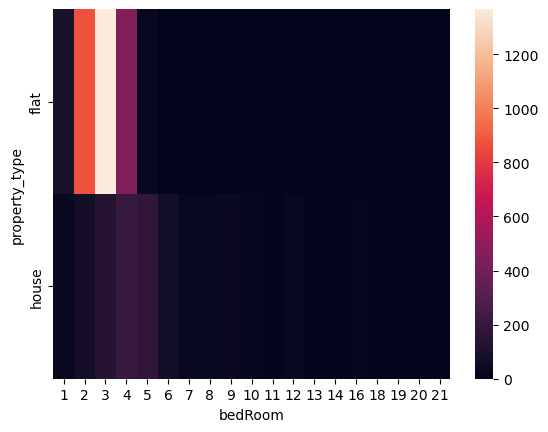

In [33]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

Observations 
- most of flats are having 2-4 B|edroom while the most of houses are having 3-5 bedroom 

<Axes: xlabel='property_type', ylabel='floorNum'>

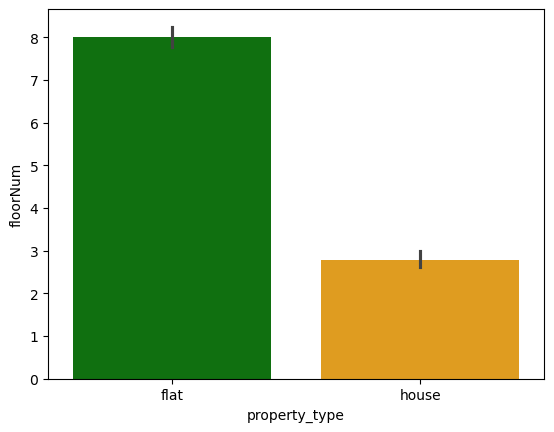

In [42]:
sns.barplot(x=df['property_type'] ,y=df['floorNum'] ,hue=df['property_type'] ,palette=['green','orange'])

<Axes: xlabel='property_type', ylabel='floorNum'>

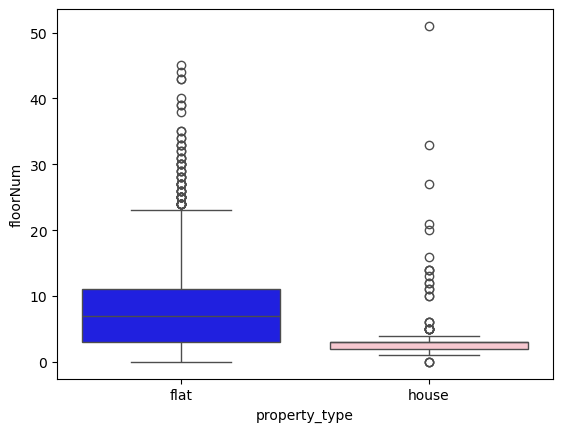

In [46]:
sns.boxplot(x=df['property_type'] ,y=df['floorNum'] ,hue =df['property_type'] ,palette =['blue' ,'pink'])

In [56]:
df[(df['floorNum']>30) & (df['property_type']=='house')]

property_type              society      sector  price  price_per_sqft  \
3490         house  ireo victory valley   sector 67    8.0         22222.0   
3731         house      godrej meridien  sector 106    5.6         14000.0   

        area                  areaWithType  bedRoom  bathroom balcony  ...  \
3490  3600.0   Plot area 400(334.45 sq.m.)        6         7       3  ...   
3731  4000.0  Plot area 4000(371.61 sq.m.)        5         4       3  ...   

      super_built_up_area built_up_area carpet_area  Study room  Servant room  \
3490                  NaN        3600.0         NaN           1             1   
3731                  NaN        4000.0         NaN           1             1   

      Store room  pooja room  others  furnishing_type  luxury_score  
3490           0           1       0                2            49  
3731           1           1       0                0           151  

[2 rows x 23 columns]

Observations 
- In case of house it seems there are some outliers 
- But after looking at data we found out that these houses are basically villa built at the top of socities 

<Axes: xlabel='agePossession', ylabel='property_type'>

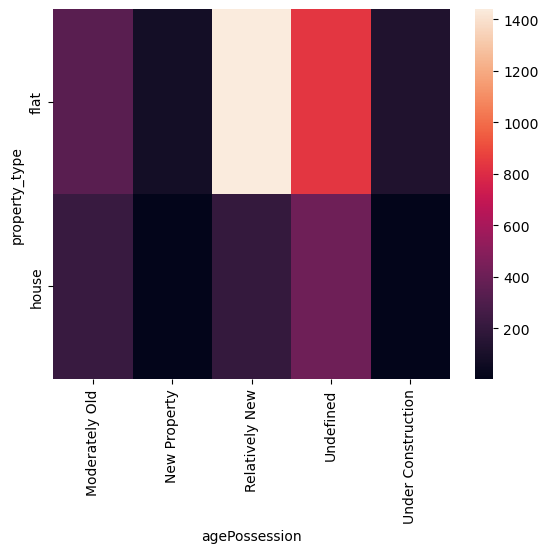

In [61]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

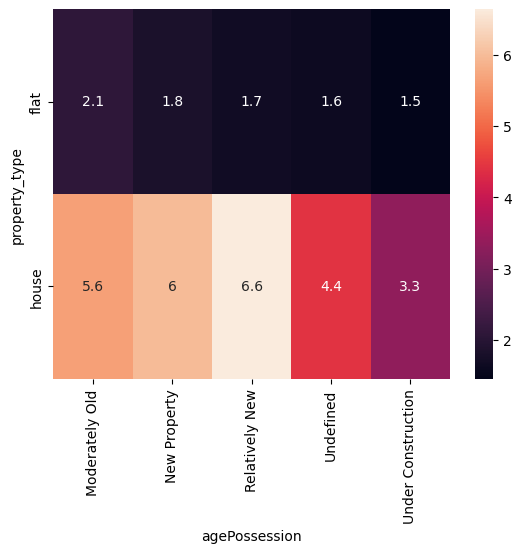

In [71]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession' ,values ='price',aggfunc ='mean'),annot=True)

Observations 
- From this we can see that most of the properties are New Property in the case of houses
  

<Axes: xlabel='property_type', ylabel='luxury_score'>

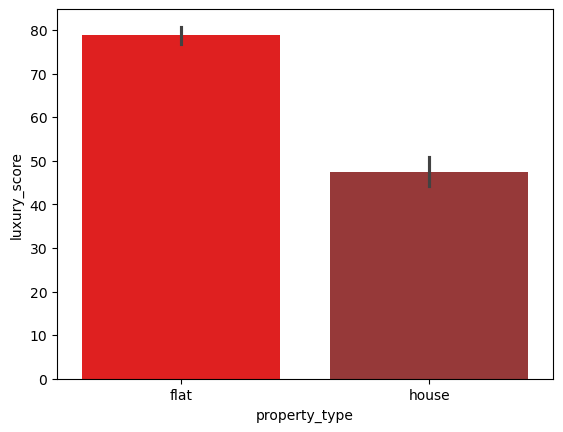

In [76]:
sns.barplot(x=df['property_type'] ,y=df['luxury_score'] ,hue =df['property_type'] ,palette=['red','brown'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

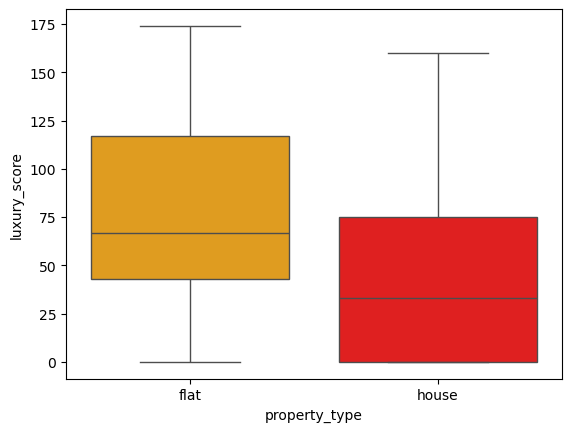

In [80]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'] ,hue =df['property_type'],palette=['orange','red'])

<Axes: xlabel='sector', ylabel='property_type'>

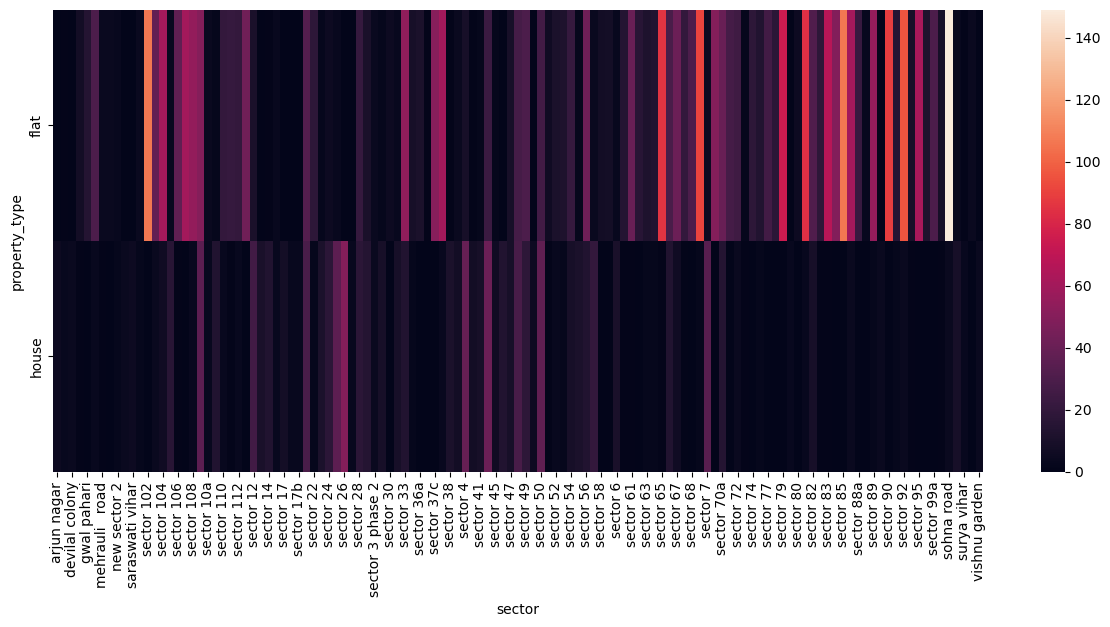

In [86]:
# Sectors

plt.figure(figsize =(15,6))
sns.heatmap(pd.crosstab(df['property_type'] ,df['sector'].sort_index()))

Observations 
- Most of the sector after 70 are having very less number of houses but more number of flats 


In [95]:
import re 

# Group by sector and calculate avg price 
avg_price_per_sector =df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector number 
def extract_sector_number(sector_name):
    match =re.search(r'\d+',sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a very large number 

avg_price_per_sector['sector_number'] =avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number 

avg_price_per_sector_sorted_by_sector =avg_price_per_sector.sort_values(by='sector_number')





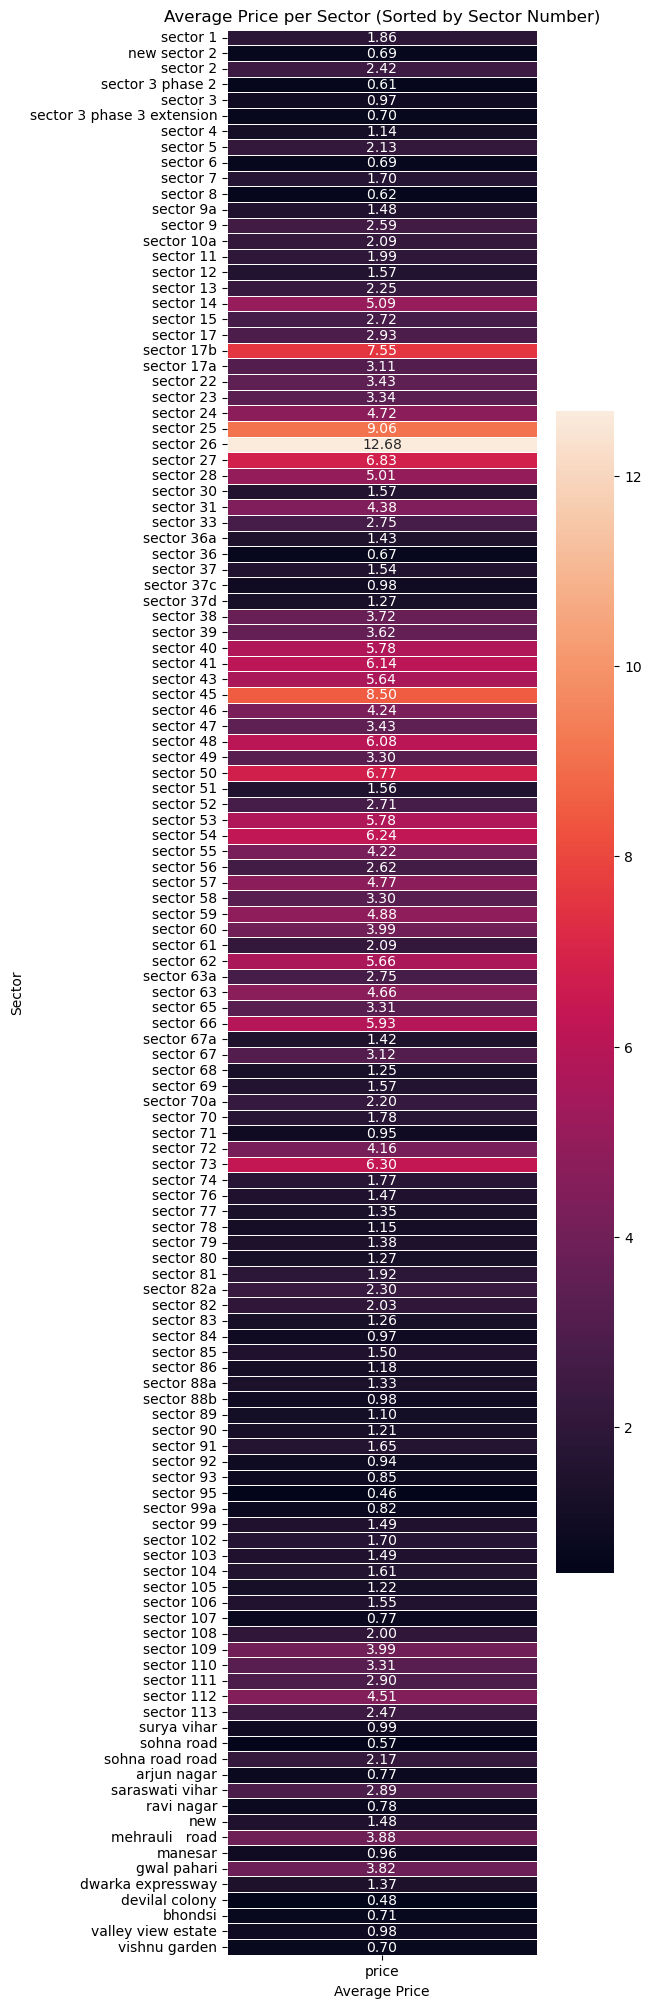

In [99]:
# plot the heatmap 
plt.figure(figsize=(5,25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

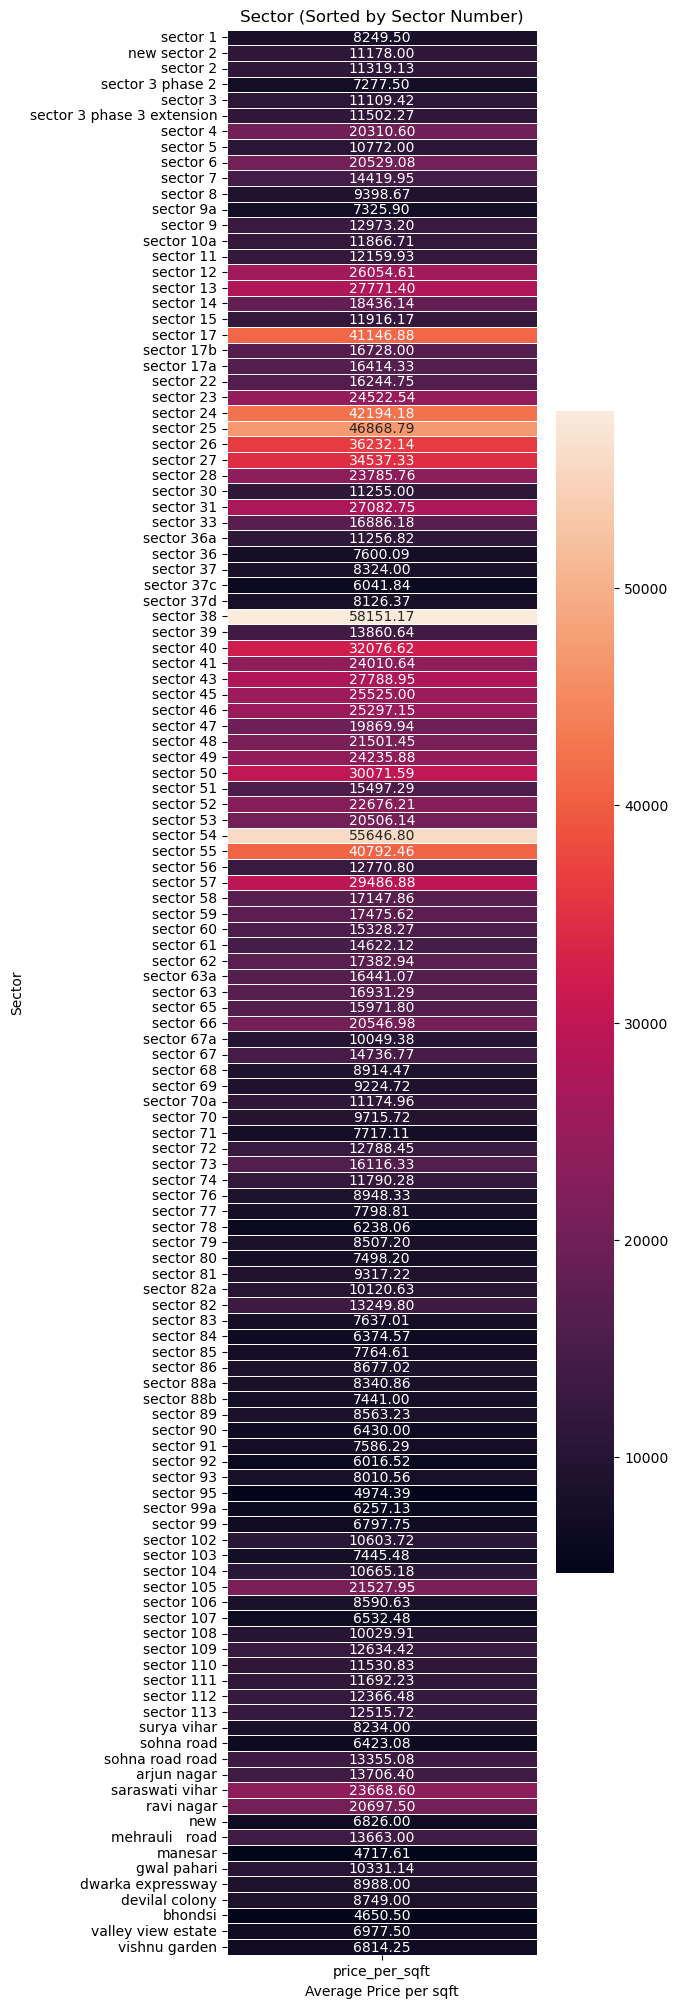

In [101]:

avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

Observations 
 -

C:\Users\rajni\AppData\Local\Temp\ipykernel_13256\1565731101.py:2: UserWarning: 
The palette list has fewer values (2) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x =df[df['area']<10000]['area'],y=df['price'],hue =df['bedRoom'] ,palette=['brown','green'])


<Axes: xlabel='area', ylabel='price'>

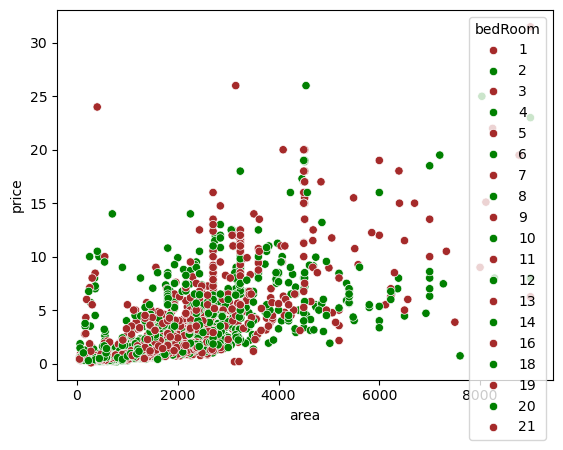

In [115]:
plt.figure(figure=(12,8))
sns.scatterplot(x =df[df['area']<10000]['area'],y=df['price'],hue =df['bedRoom'] ,palette=['brown','green'])

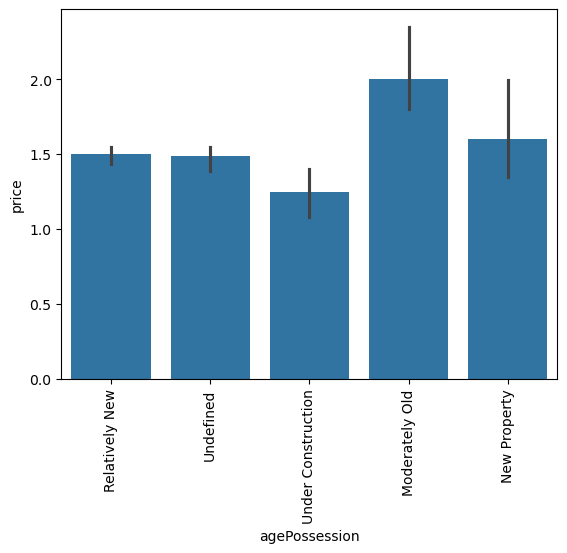

In [119]:

sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='luxury_score', ylabel='price'>

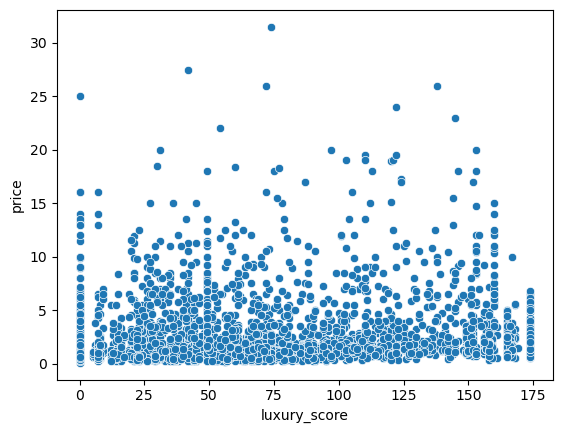

In [123]:

sns.scatterplot(x=df['luxury_score'],y=df['price'])

Correlation 


<Axes: >

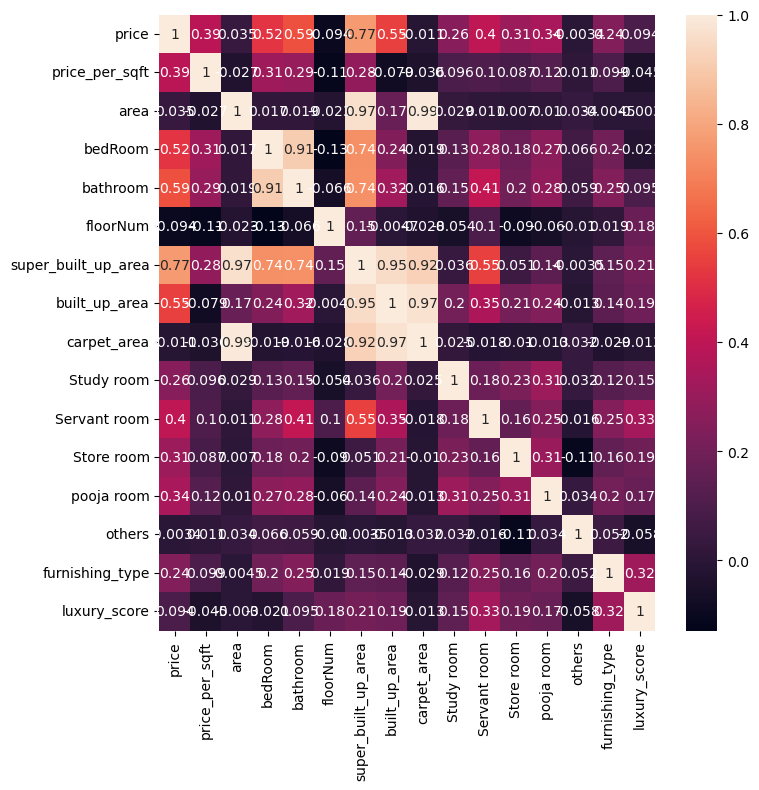

In [134]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 3782
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3658 non-null   object 
 1   society              3657 non-null   object 
 2   sector               3658 non-null   object 
 3   price                3657 non-null   float64
 4   price_per_sqft       3657 non-null   float64
 5   area                 3657 non-null   float64
 6   areaWithType         3658 non-null   object 
 7   bedRoom              3658 non-null   int64  
 8   bathroom             3658 non-null   int64  
 9   balcony              3658 non-null   object 
 10  floorNum             3639 non-null   float64
 11  facing               2874 non-null   object 
 12  agePossession        3658 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1672 non-null   float64
 15  carpet_area          1869 non-null   float6

In [142]:

df.select_dtypes(include ='number').corr()['price'].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.769691
bathroom               0.589772
built_up_area          0.551780
bedRoom                0.522944
Servant room           0.400611
price_per_sqft         0.391051
pooja room             0.341013
Store room             0.309275
Study room             0.258791
furnishing_type        0.244168
luxury_score           0.094312
area                   0.034739
others                -0.003446
carpet_area           -0.011363
floorNum              -0.094001
Name: price, dtype: float64

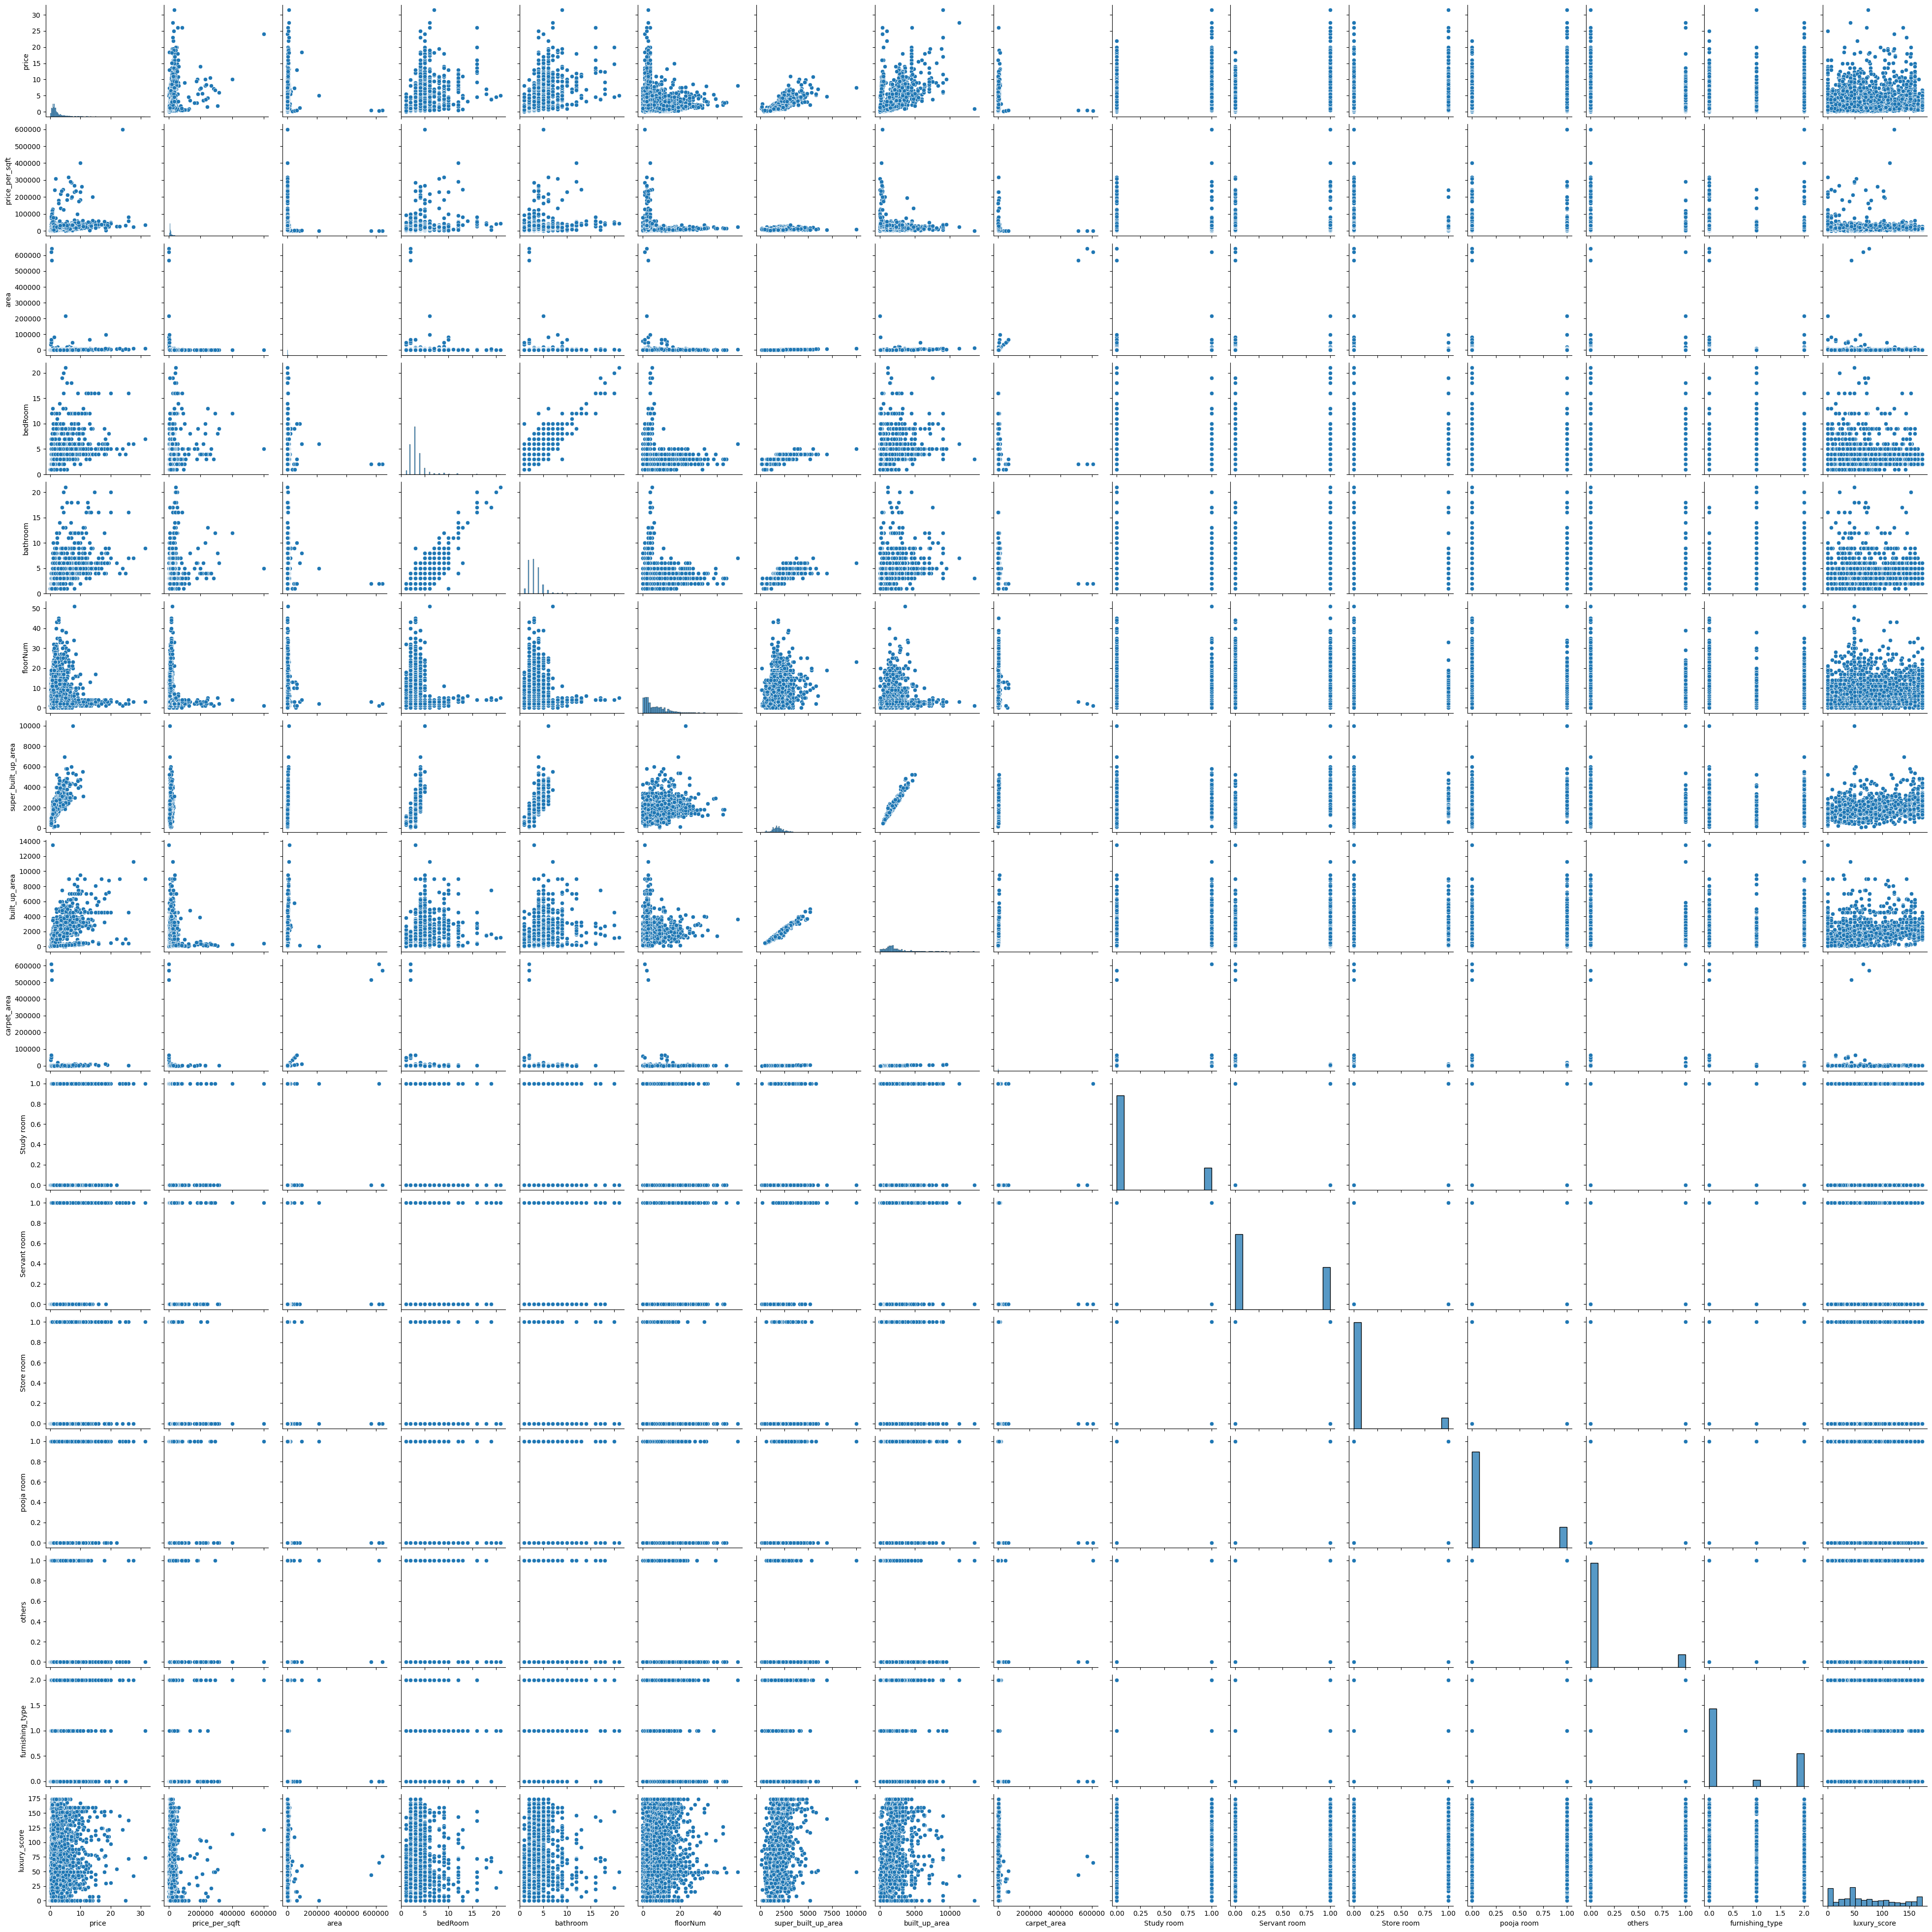

In [144]:
sns.pairplot(df)